# Resultados de cancer_sv (Nanopore)

In [1]:
outdir = "/home/alejandro/Escritorio/Master/TFM/Resultados"

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import re
import copy
import pickle
import os
import gzip
import sys
sys.path.append(f"{outdir}/../gitlab_tmp/workflow/notebooks/my_modules")
import helper_functions as hf

## NanoStat

The following plot shows the number of reads distributed by their quality scores.
The red line indicates the median quality score, whose real value is: 9.6.


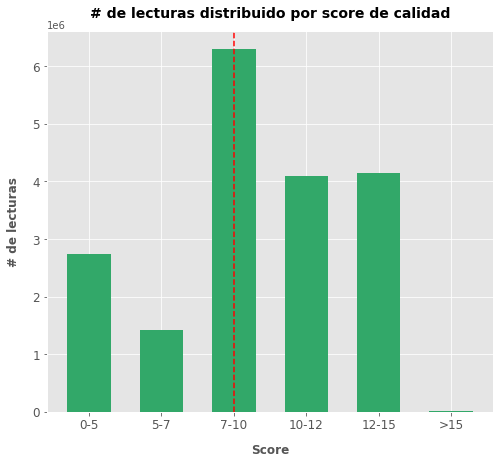

In [3]:
hf.ont_quality_dist_1(f"{outdir}/nanopore/metrics_res/nanopore_ERR2752452/NanoStats.txt")

## Número total de variantes (workflow de Nanopore)

In [6]:
n_variants_37 = []
with open(f"{outdir}/nanopore/sniffles_res/nanopore_ERR2752452_37_SV_calling.vcf") as file:
    for line in file:
        if "#" not in line[1]:
            if "#" in line[0]:
                n_variants_37.append(line[1:].strip().split())
            elif "STRANDBIAS" in line.strip().split()[0]:
                var = [line.strip().split()[0]]
                var.append("-")
                var.extend(line.strip().split()[1:])
                n_variants_37.append(var)
            else:
                n_variants_37.append(line.strip().split())
                
n_variants_37_df = pd.DataFrame(n_variants_37[1:], columns = n_variants_37[0])
n_variants_37_df

CHROM       POS     ID  \
0               NC_000001.10     10882      0   
1               NC_000001.10     54714      1   
2               NC_000001.10     66482      2   
3               NC_000001.10    227712      3   
4               NC_000001.10    445242      4   
...                      ...       ...    ...   
36385            NC_000016.9  33965597  36385   
36386            NC_000016.9  33971099  36386   
36387  NC_000017.1STRANDBIAS         -  36387   
36388  NC_000019.9STRANDBIAS         -  36388   
36389            NT_167209.1         2  36389   

                                         REF  \
0                                          N   
1      TTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTC   
2                                          N   
3                                          N   
4                                          N   
...                                      ...   
36385                                      N   
36386                                      N   
36387                                      N   
36388                                      N   
36389                                      N   

                                                     ALT QUAL FILTER  \
0              TGGAAGGCCCAGGAGGAGGCGTGGCACAGGCCATAGACACA    .   PASS   
1                                                      N    .   PASS   
2      TATAGAATATAATATATATTTTATTATAAAATATATATAGAGATAT...    .   PASS   
3      CTATGTATTGTCTGTAATCCAGTCATTAGATGTCTACAATTAAATC...    .   PASS   
4      GAGGAGAAAGAGGGGGATATAGAGAGAGAAAGGAGGGGGCTAGAGA...    .   PASS   
...                                                  ...  ...    ...   
36385                               ]NT_167223.1:16504]N    .   PASS   
36386                            ]NC_000021.8:10707432]N    .   PASS   
36387                              ]NT_167214.1:161803]N    .   PASS   
36388                             N[NC_000024.9:9960180[    .   PASS   
36389                               ]NT_167239.1:36653]N    .   PASS   

                                                    INFO    FORMAT  \
0      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
1      PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00000...  GT:DR:DV   
2      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
3      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
4      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
...                                                  ...       ...   
36385  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NT_16722...  GT:DR:DV   
36386  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00002...  GT:DR:DV   
36387  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NT_16721...  GT:DR:DV   
36388  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00002...  GT:DR:DV   
36389  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NT_16723...  GT:DR:DV   

      /storage/scratch01/users/amartinm/TFM/nanopore/sorted_bam/nanopore_ERR2752452_37_sorted.bam  
0                                              0/0:61:25                                           
1                                              0/1:21:18                                           
2                                              0/1:18:15                                           
3                                             0/0:149:40                                           
4                                              0/1:15:11                                           
...                                                  ...                                           
36385                                         0/0:572:16                                           
36386                                        0/0:2692:13                                           
36387                                          0/1:65:63                                           
36388                                         0/0:322:15                                           
36389                                           1/1

## Número y tipo de las variantes identificadas

In [7]:
variant_types_37 = hf.sv_counter(n_variants_37_df)

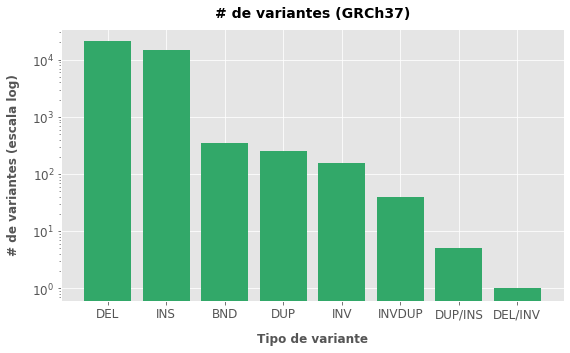

In [8]:
plt.figure(figsize = (9, 5))
hf.sv_number_barplot(variant_types_37, 37, log = True)

In [ ]:
# # Distribución con un diagrama de barras colapsado
# variant_types_labels = list(variant_types.keys())
# variant_types_values = {"ONT": [round(value/sum(list(variant_types.values()))*100, 2)
#                                 for value in list(variant_types.values())]}
# variant_stacked(variant_types_values, variant_types_labels)
# variant_stacked(variant_types_values, variant_types_labels, index = True, index_num = 2, legend = False)
# variant_stacked(variant_types_values, variant_types_labels, index = True, index_num = 5, legend = False);

## Número total de variantes de la referencia y su búsqueda

In [9]:
i_variants_0 = []
with open(f"{outdir}/illumina/ListforNatureReports.IndelsandSNVs.final.Suppl1.snpEff.validated.vcf") as file:
    for line in file:
        if "#" not in line[1]:
            if "#" in line[0]:
                i_variants_0.append(line[1:].strip().split())
            else:
#               if (line.strip().split()[6] == "PASS") and ("INDEL" in line.strip().split()[7]):
                if "INDEL" in line.strip().split()[7]:
                    variant = line.strip().split()
                    variant[1] = int(variant[1])
                    i_variants_0.append(variant)
                
i_variants_0_df = pd.DataFrame(i_variants_0[1:], columns = i_variants_0[0])
i_variants_0_df.CHROM = "chr" + i_variants_0_df.CHROM
i_variants_0_df.sort_values(by = [i_variants_0_df.columns[0], i_variants_0_df.columns[1]], inplace = True)
i_variants_0_df

CHROM        POS           ID       REF  ALT QUAL FILTER  \
0    chr1    1977024            .         C   CT    .   PASS   
1    chr1   27523283            .        CG    C    .   PASS   
2    chr1  106219874            .         A   AC    .   PASS   
3    chr1  119183537            .  CACAAAAA    C    .   PASS   
4    chr1  120663139            .        CG    C    .      .   
..    ...        ...          ...       ...  ...  ...    ...   
419  chrX  112581038  rs199593096         C   CT    .      .   
420  chrX  113798534            .     AAAAC    A    .   PASS   
421  chrX  132628700            .         T  TTC    .   PASS   
422  chrX  134781634            .        AC    A    .   PASS   
423  chrX  137473115            .         G   GT    .   PASS   

                                                  INFO           FORMAT  \
0    TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
1    TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
2    TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
3    TYPE=INDEL;GROWTHS_COUNT=3;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
4    TYPE=INDEL;GROWTHS_COUNT=2;GROWTHS=TGEN;GROWTH...  GT:AD:DP:MIN_DP   
..                                                 ...              ...   
419  TYPE=INDEL;GROWTHS_COUNT=1;GROWTHS=TGEN;EFF=IN...  GT:AD:DP:MIN_DP   
420  TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
421  TYPE=INDEL;GROWTHS_COUNT=3;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
422  TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   
423  TYPE=INDEL;GROWTHS_COUNT=4;GROWTHS=Illumina;GR...  GT:AD:DP:MIN_DP   

    COLO_829BL_llumina COLO_829BL_EPleasance COLO_829BL_TGEN   COLO_829BL_GSC  \
0          ./.:.:73:73           ./.:.:58:58     ./.:.:64:64      ./.:.:59:59   
1          ./.:.:75:75           ./.:.:29:29     ./.:.:64:64      ./.:.:48:48   
2          ./.:.:82:82           ./.:.:33:33     ./.:.:84:84    ./.:.:108:108   
3          ./.:.:75:75             ./.:.:7:7     ./.:.:73:73    ./.:.:133:133   
4          ./.:.:23:23           ./.:.:13:13     ./.:.:31:31      ./.:.:56:56   
..                 ...                   ...             ...              ...   
419     ./.:6,9,0:15:.       ./.:1,10,0:11:.     ./.:.:24:24  ./.:20,9,0:29:.   
420        ./.:.:48:48           ./.:.:22:22     ./.:.:25:25      ./.:.:45:45   
421        ./.:.:26:26           ./.:.:13:13     ./.:.:35:35      ./.:.:36:36   
422        ./.:.:58:58           ./.:.:18:18     ./.:.:36:36      ./.:.:61:61   
423        ./.:.:38:38           ./.:.:11:11     ./.:.:35:35      ./.:.:61:61   

    COLO_829_Illumina COLO_829_EPleasance     COLO_829_TGEN      COLO_829_GSC  
0    0/1:17,45,0:62:.     0/1:8,32,0:40:.   1/1:0,39,0:39:.   0/1:7,22,0:29:.  
1    0/1:13,47,0:60:.     0/1:6,14,0:20:.   1/1:0,43,0:43:.  0/1:12,24,0:36:.  
2    0/1:36,34,0:70:.    0/1:19,10,0:29:.  0/1:35,34,0:69:.  0/1:31,28,0:59:.  
3     1/1:0,47,0:47:.      ./.:1,9,0:10:.   1/1:1,44,0:45:.   1/1:0,71,0:71:.  
4       ./.:5,2,0:7:.      ./.:5,6,0:11:.    0/1:7,5,0:12:.  0/1:15,11,0:26:.  
..                ...                 ...               ...               ...  
419   ./.:0,53,0:53:.     ./.:0,22,0:22:.   1/1:0,43,0:43:.   ./.:0,50,0:50:.  
420   1/1:0,75,0:75:.     1/1:0,18,0:18:.   1/1:0,55,0:55:.   1/1:0,48,0:48:.  
421   1/1:0,42,0:42:.     ./.:1,13,0:14:.   1/1:0,39,0:39:.   1/1:3,44,0:47:.  
422   1/1:0,65,0:65:.     1/1:0,22,0:22:.   1/1:0,55,0:55:.   1/1:0,57,0:57:.  
423   1/1:0,48,0:48:.     1/1:0,29,0:29:.   1/1:0,72,0:72:.   1/1:0,88,0:88:.  

[424 rows x 17 columns]

In [10]:
n_variants_37_f_df = n_variants_37_df.iloc[list((n_variants_37_df.CHROM.str.contains("STRANDBIAS") == False) &
                                                (n_variants_37_df.INFO.str.contains("BND") == False))]
n_variants_37_f_df_mod = hf.both_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                           n_variants_37_f_df,
                                           unlocalized = True,
                                           remove = True)
n_variants_37_f_df_mod

CHROM       POS     ID                                     REF  \
32758  chr1         2  35258                                       N   
32759  chr1         6  35259                                       N   
32760  chr1       300  35260                                       N   
32761  chr1       807  35261                                       N   
32762  chr1      2130  35264                                       N   
...     ...       ...    ...                                     ...   
31913  chrY  59007207  34216                                       N   
31914  chrY  59013742  34217                                       N   
31915  chrY  59017779  34218                                       N   
31916  chrY  59022272  34219  AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA   
31917  chrY  59034251  34220                                       N   

                                                     ALT QUAL FILTER  \
32758                                              <DUP>    .   PASS   
32759                                              <INV>    .   PASS   
32760  GTAATCATCATCAATGGAATTAAAAAATAACCATCATCAATTGGTA...    .   PASS   
32761    GAATCGAATGGATCATCAAATGGAATCAGATGGAATCATCATCAAAT    .   PASS   
32762  ACTCCGAATGCATCATCAATGGAATCGAATGAATCATCGGACTTCG...    .   PASS   
...                                                  ...  ...    ...   
31913                    GGACCAAGTTCAAAATTAACCACATATAGAC    .   PASS   
31914  CCTGCTCAGCCTCCCAAGCAATGGGATTACATATAACTCAACAATC...    .   PASS   
31915                    TATATATATATATATATATATATATATATAT    .   PASS   
31916                                                  N    .   PASS   
31917  GGTTTCTTTTTTTTTTTTTTTGAGGCCGAGGAGTCTGAAGCTCCTT...    .   PASS   

                                                    INFO    FORMAT  \
32758  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NW_00387...  GT:DR:DV   
32759  IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NW_003...  GT:DR:DV   
32760  IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NW_003...  GT:DR:DV   
32761  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NW_00387...  GT:DR:DV   
32762  IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NW_003...  GT:DR:DV   
...                                                  ...       ...   
31913  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00002...  GT:DR:DV   
31914  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00002...  GT:DR:DV   
31915  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00002...  GT:DR:DV   
31916  PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00002...  GT:DR:DV   
31917  IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   

      /storage/scratch01/users/amartinm/TFM/nanopore/sorted_bam/nanopore_ERR2752452_37_sorted.bam  
32758                                         0/0:183:24                                           
32759                                         0/0:393:10                                           
32760                                         0/0:964:30                                           
32761                                        0/0:1140:16                                           
32762                                        0/0:1365:14                                           
...                                                  ...                                           
31913                                          0/1:64:49                                           
31914                                         1/1:39:272                                           
31915                                          0/1:23:38                                           
31916                                          1/1:16:89                                           
31917                                           1/1:1:12                                           

[32229 rows x 10 columns]

In [11]:
_ = hf.SVs_coincident_counter(i_variants_0_df, n_variants_37_f_df_mod)

The approach followed in the built workflow has driven to the identification of
0 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 0.0% of the originaly identified SVs.


In [12]:
_ = hf.SVs_coincident_counter(i_variants_0_df, n_variants_37_f_df_mod, range_num = 0.5)

The approach followed in the built workflow has driven to the identification of
0 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 0.0% of the originaly identified SVs.


In [13]:
found_variants_37_ont_500_df, not_found_variants_37_ont_500_df = hf.SVs_coincident_counter(i_variants_0_df,
                                                                                           n_variants_37_f_df_mod,
                                                                                           range_num = 500)

The approach followed in the built workflow has driven to the identification of
2 SVs out of the 424 identified in the work from which the data was obtained.
It means recovering 0.47% of the originaly identified SVs.


In [14]:
for pos in range(len(found_variants_37_ont_500_df)):
    var = found_variants_37_ont_500_df.iloc[pos]
    df = n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.CHROM == var.CHROM) &
                                          (n_variants_37_f_df_mod.POS.between(var.POS - 500, var.POS + 500)))]
    print(var.to_list())
    print(df.iloc[0].to_list())
    print()

['chr7', 110835883, '.', 'T', 'TATTTC', '.', 'PASS', 'TYPE=INDEL;GROWTHS_COUNT=3;GROWTHS=Illumina;GROWTHS=TGEN;GROWTHS=GSC;EFF=INTRON(MODIFIER||||110|IMMP2L|protein_coding|CODING|ENST00000437687|2|1),INTRON(MODIFIER||||110|IMMP2L|protein_coding|CODING|ENST00000437687|2|2),INTRON(MODIFIER||||110|IMMP2L|protein_coding|CODING|ENST00000447215|3|1),INTRON(MODIFIER||||110|IMMP2L|protein_coding|CODING|ENST00000447215|3|2),INTRON(MODIFIER||||157|IMMP2L|protein_coding|CODING|ENST00000450877|2|1),INTRON(MODIFIER||||157|IMMP2L|protein_coding|CODING|ENST00000450877|2|2),INTRON(MODIFIER||||175|IMMP2L|protein_coding|CODING|ENST00000331762|4|1),INTRON(MODIFIER||||175|IMMP2L|protein_coding|CODING|ENST00000331762|4|2),INTRON(MODIFIER||||175|IMMP2L|protein_coding|CODING|ENST00000405709|3|1),INTRON(MODIFIER||||175|IMMP2L|protein_coding|CODING|ENST00000405709|3|2),INTRON(MODIFIER||||175|IMMP2L|protein_coding|CODING|ENST00000415362|2|1),INTRON(MODIFIER||||175|IMMP2L|protein_coding|CODING|ENST00000415362|2|

## Distribución de variantes en función de su longitud

In [15]:
n_variants_37_df_mod = hf.RM_ont_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                           n_variants_37_df)
n_variants_37_df_mod

CHROM variant_begin variant_end  SV_length SV_type
ID                                                      
35258  chr1             2       58301      58299     DUP
35259  chr1             6       58313      58307     INV
35260  chr1           300         374         74     INS
35261  chr1           807         855         48     INS
35264  chr1          2130        2561        431     INS
...     ...           ...         ...        ...     ...
34144  chrY             -           -   45503863     INV
34186  chrY             -           -         35     INS
34195  chrY             -           -         31     INS
36335  chrY             -           -          1     BND
36337  chrY             -           -          1     BND

[36390 rows x 5 columns]

In [16]:
n_variants_37_df_mod.iloc[list((n_variants_37_df_mod.SV_type == "BND"))]

CHROM variant_begin variant_end  SV_length SV_type
ID                                                      
36366  chr1         49317       49318          1     BND
36369  chr1        227418      227419          1     BND
36037  chr1        813803      813804          1     BND
36038  chr1        818626      818627          1     BND
36039  chr1       3995269     3995270          1     BND
...     ...           ...         ...        ...     ...
36336  chrY      13472427    13472428          1     BND
36338  chrY      13477143    13477144          1     BND
36339  chrY      13479030    13479031          1     BND
36335  chrY             -           -          1     BND
36337  chrY             -           -          1     BND

[355 rows x 5 columns]

In [17]:
for sv_type in list(np.unique(n_variants_37_df_mod.SV_type.to_list())):
    print(sv_type + " stats:")
    print(n_variants_37_df_mod.iloc[list(n_variants_37_df_mod.SV_type == sv_type)].SV_length.describe())
    print()

BND stats:
count    355.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: SV_length, dtype: float64

DEL stats:
count    2.092900e+04
mean    -8.256924e+03
std      6.452556e+05
min     -7.189182e+07
25%     -1.370000e+02
50%     -5.100000e+01
75%     -3.700000e+01
max     -3.100000e+01
Name: SV_length, dtype: float64

DEL/INV stats:
count      1.0
mean    -285.0
std        NaN
min     -285.0
25%     -285.0
50%     -285.0
75%     -285.0
max     -285.0
Name: SV_length, dtype: float64

DUP stats:
count    2.520000e+02
mean     3.651856e+05
std      4.758153e+06
min      6.000000e+01
25%      6.820000e+02
50%      3.433000e+03
75%      1.229075e+04
max      7.521689e+07
Name: SV_length, dtype: float64

DUP/INS stats:
count       5.000000
mean     1000.600000
std       932.285525
min       345.000000
25%       577.000000
50%       598.000000
75%       845.000000
max      2638.000000
Name: SV_length, dtype: float64

INS stats:
c

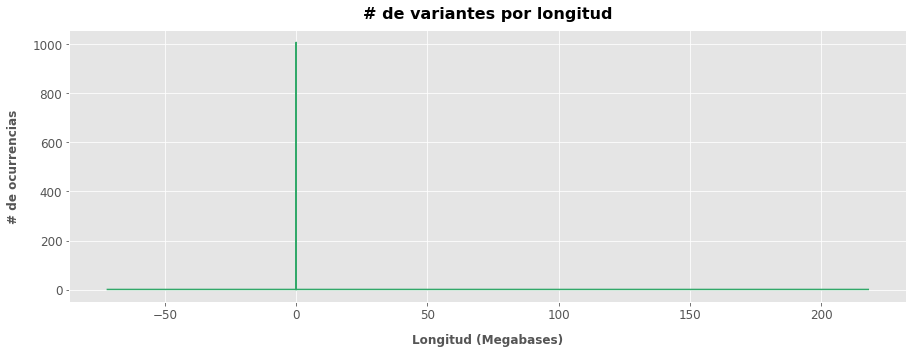

In [18]:
hf.SVs_length_count_plot(n_variants_37_df_mod, "nanopore")

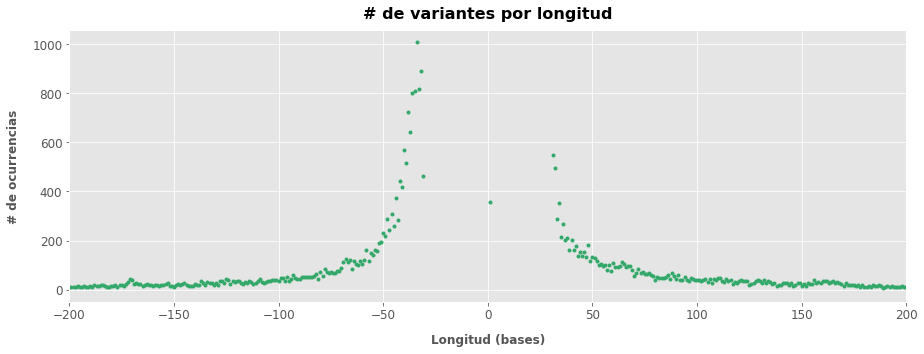

In [19]:
hf.SVs_length_count_plot(n_variants_37_df_mod, "nanopore", zoom = True)

In [20]:
np.absolute(n_variants_37_df_mod.iloc[list((n_variants_37_df_mod.SV_type != "BND"))].SV_length).describe()

count    3.603500e+04
mean     2.527624e+04
std      1.779762e+06
min      3.100000e+01
25%      3.900000e+01
50%      6.400000e+01
75%      1.860000e+02
max      2.178604e+08
Name: SV_length, dtype: float64

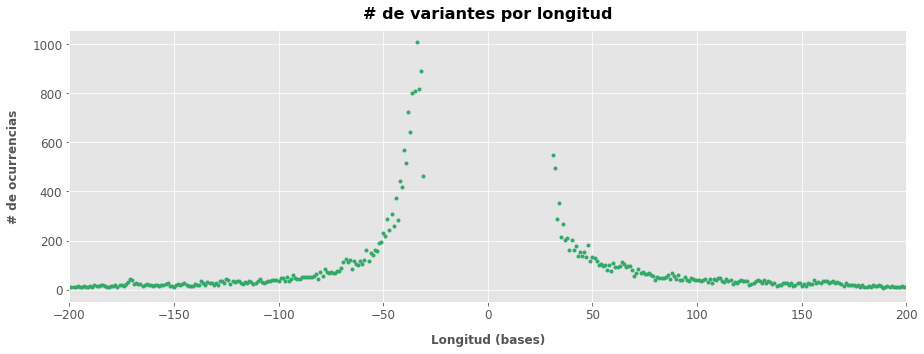

In [21]:
hf.SVs_length_count_plot(n_variants_37_df_mod.iloc[list((n_variants_37_df_mod.SV_type != "BND"))],
                         "nanopore",
                         zoom = True)

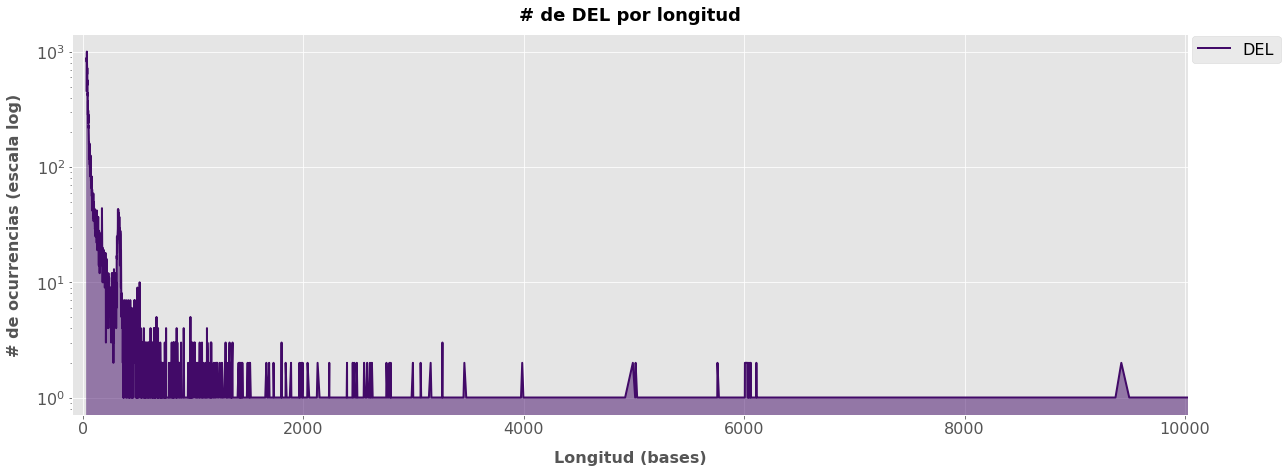

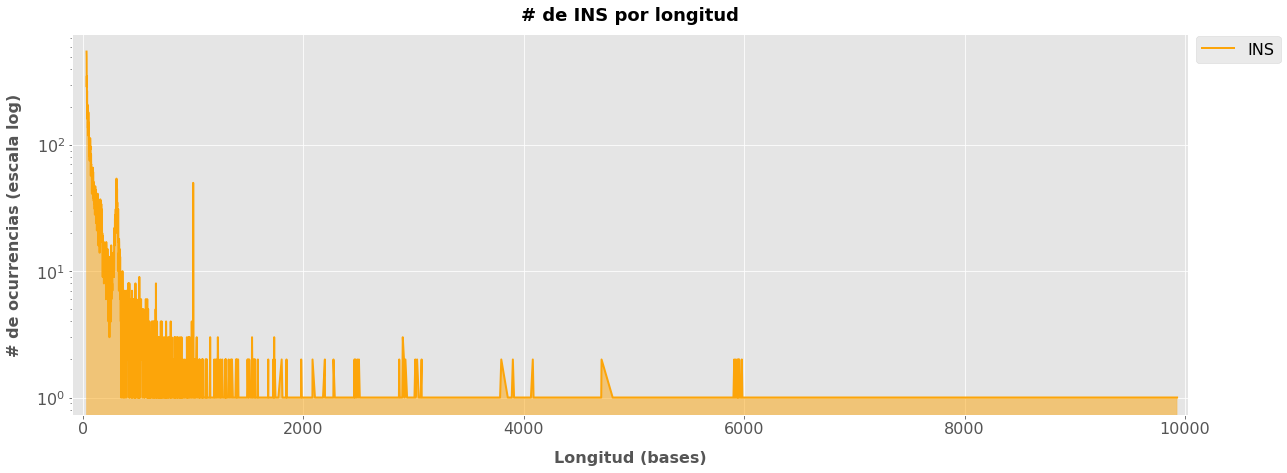

In [22]:
INS_DEL_37 = hf.INS_DEL_length_count_plot(n_variants_37_df_mod, "nanopore")

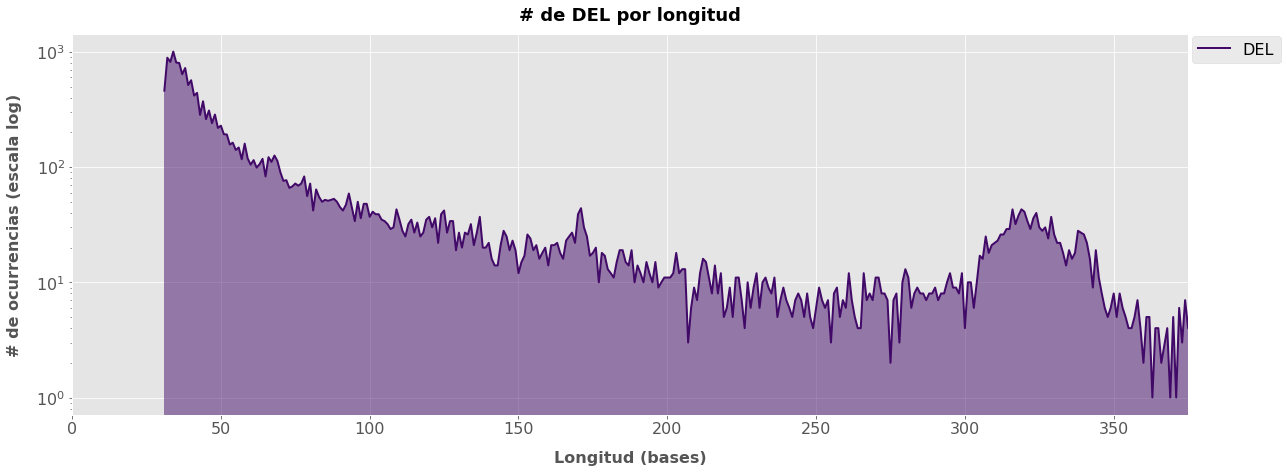

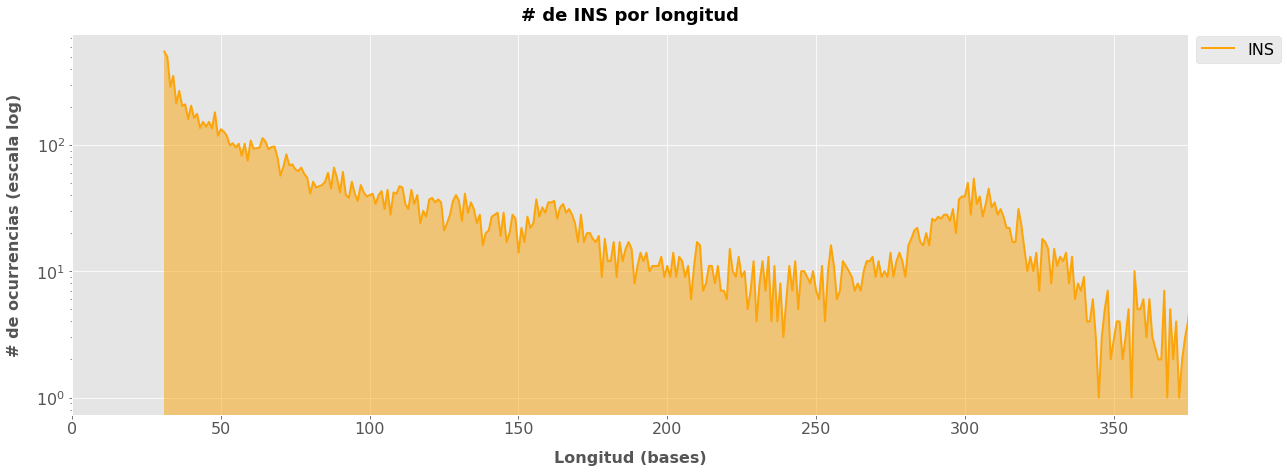

In [23]:
INS_DEL_37_zoom_0 = hf.INS_DEL_length_count_plot(n_variants_37_df_mod, "nanopore", zoom = True)

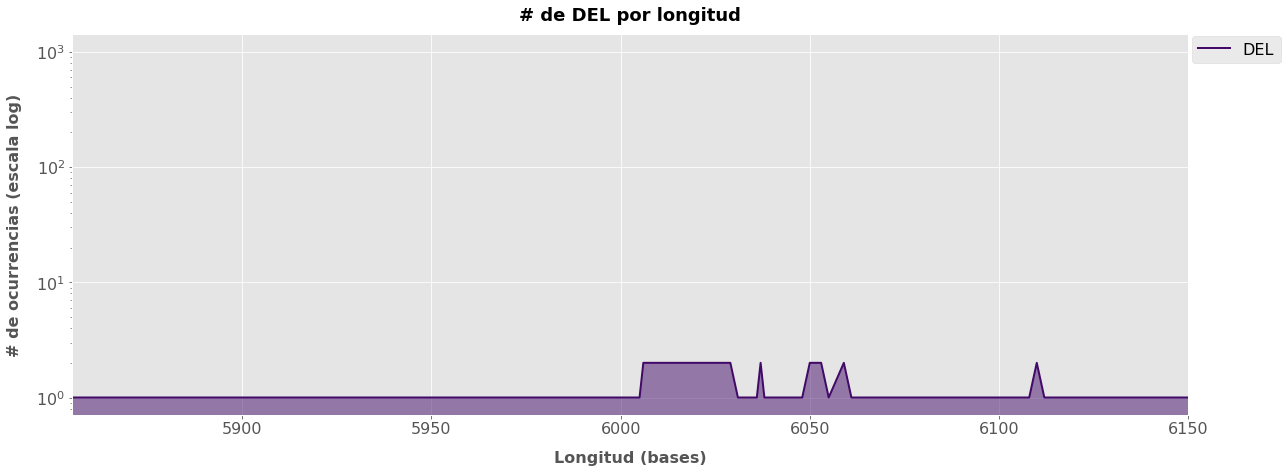

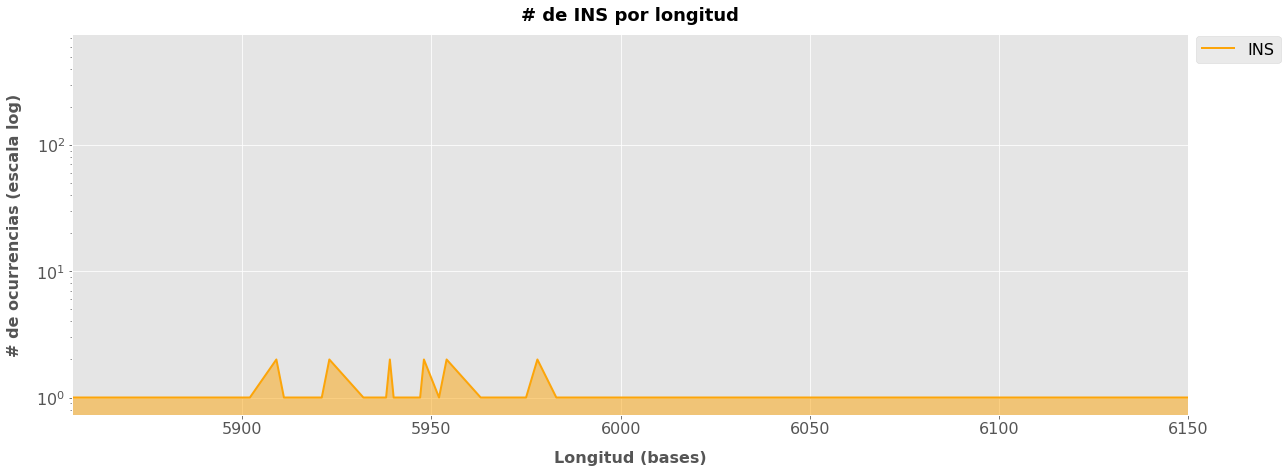

In [24]:
INS_DEL_37_zoom_1 = hf.INS_DEL_length_count_plot(n_variants_37_df_mod, "nanopore", zoom = True,
                                                 zoom_range = [5855, 6150])

In [25]:
len(n_variants_37_df_mod.iloc[list((n_variants_37_df_mod.SV_type == "INS") &
                                   (n_variants_37_df_mod.SV_length <= 1000))]) / \
len(n_variants_37_df_mod.iloc[list((n_variants_37_df_mod.SV_type == "INS"))])

0.9491571691803726

In [26]:
len(n_variants_37_df_mod.iloc[list((n_variants_37_df_mod.SV_type == "DEL") &
                                   (np.absolute(n_variants_37_df_mod.SV_length) <= 1000))]) / \
len(n_variants_37_df_mod.iloc[list((n_variants_37_df_mod.SV_type == "DEL"))])

0.947202446366286

In [27]:
n_variants_37_df_mod.iloc[list((n_variants_37_df_mod.SV_type != "INS") &
                               (n_variants_37_df_mod.SV_type != "DEL"))]

CHROM variant_begin variant_end  SV_length SV_type
ID                                                      
35258  chr1             2       58301      58299     DUP
35259  chr1             6       58313      58307     INV
35344  chr1         19369       21397       2028     INV
35357  chr1         19369       26806       7437     INV
35358  chr1         21448       58330      36882     INV
...     ...           ...         ...        ...     ...
34178  chrY      28577974    58967659   30389685     INV
34083  chrY             -           -       1857  INVDUP
34144  chrY             -           -   45503863     INV
36335  chrY             -           -          1     BND
36337  chrY             -           -          1     BND

[808 rows x 5 columns]

In [28]:
for sv_type in np.unique(n_variants_37_df_mod.iloc[list((n_variants_37_df_mod.SV_type != "INS") &
                                                        (n_variants_37_df_mod.SV_type != "DEL"))].SV_type):
    print(sv_type + " stats:")
    print(n_variants_37_df_mod.iloc[list(n_variants_37_df_mod.SV_type == sv_type)].SV_length.describe())
    print()

BND stats:
count    355.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: SV_length, dtype: float64

DEL/INV stats:
count      1.0
mean    -285.0
std        NaN
min     -285.0
25%     -285.0
50%     -285.0
75%     -285.0
max     -285.0
Name: SV_length, dtype: float64

DUP stats:
count    2.520000e+02
mean     3.651856e+05
std      4.758153e+06
min      6.000000e+01
25%      6.820000e+02
50%      3.433000e+03
75%      1.229075e+04
max      7.521689e+07
Name: SV_length, dtype: float64

DUP/INS stats:
count       5.000000
mean     1000.600000
std       932.285525
min       345.000000
25%       577.000000
50%       598.000000
75%       845.000000
max      2638.000000
Name: SV_length, dtype: float64

INV stats:
count    1.560000e+02
mean     4.114536e+06
std      2.502779e+07
min      1.440000e+02
25%      2.240500e+03
50%      1.466900e+04
75%      8.483325e+04
max      2.178604e+08
Name: SV_length, dtype: float64

INVDUP stats

## RepeatMasker

In [29]:
n_variants_37_f = []
with open(f"{outdir}/nanopore/sniffles_res/nanopore_ERR2752452_37_SV_calling.vcf") as file:
    for line in file:
        if "#" not in line[1]:
            if "#" in line[0]:
                n_variants_37_f.append(line[1:].strip().split())
            else:
                if ("STRANDBIAS" not in line.strip().split()[0]) and ("BND" not in line.strip().split()[7]):
                    n_variants_37_f.append(line.strip().split())
                
n_variants_37_f_df = pd.DataFrame(n_variants_37_f[1:], columns = n_variants_37_f[0])
n_variants_37_f_df

CHROM     POS     ID  \
0      NC_000001.10   10882      0   
1      NC_000001.10   54714      1   
2      NC_000001.10   66482      2   
3      NC_000001.10  227712      3   
4      NC_000001.10  445242      4   
...             ...     ...    ...   
33327   NC_012920.1   12506  36027   
33328   NC_012920.1   12218  36028   
33329   NC_012920.1   13675  36031   
33330   NC_012920.1   14244  36032   
33331   NC_012920.1   14615  36034   

                                                     REF  \
0                                                      N   
1                  TTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTCTTTC   
2                                                      N   
3                                                      N   
4                                                      N   
...                                                  ...   
33327  TAGACCAAGAAGTTATTATCTCGAACTGACACTGAGCCACAACCCA...   
33328  AATATCTACTCATCTTCCTAATTACCATACTAATCTTAGTTACCGC...   
33329  AACCCCACCCTACTAAACCCCATTAAACGCCTGGCAGCCGGAAGCC...   
33330  CCCCCGCACCAATAGGATCCTCCCGAATCAACCCTGACCCCTCTCC...   
33331  CTAAACCCCCATAAATAGGAGAAGGCTTAGAAGAAAACCCCACAAA...   

                                                     ALT QUAL FILTER  \
0              TGGAAGGCCCAGGAGGAGGCGTGGCACAGGCCATAGACACA    .   PASS   
1                                                      N    .   PASS   
2      TATAGAATATAATATATATTTTATTATAAAATATATATAGAGATAT...    .   PASS   
3      CTATGTATTGTCTGTAATCCAGTCATTAGATGTCTACAATTAAATC...    .   PASS   
4      GAGGAGAAAGAGGGGGATATAGAGAGAGAAAGGAGGGGGCTAGAGA...    .   PASS   
...                                                  ...  ...    ...   
33327                                                  N    .   PASS   
33328                                                  N    .   PASS   
33329                                                  N    .   PASS   
33330                                                  N    .   PASS   
33331                                                  N    .   PASS   

                                                    INFO    FORMAT  \
0      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
1      PRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_00000...  GT:DR:DV   
2      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
3      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
4      IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_000...  GT:DR:DV   
...                                                  ...       ...   
33327  IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_012...  GT:DR:DV   
33328  IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_012...  GT:DR:DV   
33329  IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_012...  GT:DR:DV   
33330  IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_012...  GT:DR:DV   
33331  IMPRECISE;SVMETHOD=Snifflesv1.0.12;CHR2=NC_012...  GT:DR:DV   

      /storage/scratch01/users/amartinm/TFM/nanopore/sorted_bam/nanopore_ERR2752452_37_sorted.bam  
0                                              0/0:61:25                                           
1                                              0/1:21:18                                           
2                                              0/1:18:15                                           
3                                             0/0:149:40                                           
4                                              0/1:15:11                                           
...                                                  ...                                           
33327                                        0/0:6465:49                                           
33328                                        0/0:7351:18                                           
33329                                        0/0:6380:33                                           
33330                                        0/0:6616:53                                           
33331                         

In [30]:
n_variants_37_f_df_mod = hf.RM_ont_df_parser(f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                             n_variants_37_f_df,
                                             unlocalized = True,
                                             remove = True)
n_variants_37_f_df_mod

CHROM  variant_begin  variant_end  SV_length SV_type
ID                                                        
35258  chr1              2        58301      58299     DUP
35259  chr1              6        58313      58307     INV
35260  chr1            300          374         74     INS
35261  chr1            807          855         48     INS
35264  chr1           2130         2561        431     INS
...     ...            ...          ...        ...     ...
34216  chrY       59007207     59007238         31     INS
34217  chrY       59013742     59013874        132     INS
34218  chrY       59017779     59017812         33     INS
34219  chrY       59022272     59022305        -33     DEL
34220  chrY       59034251     59034556        305     INS

[32229 rows x 5 columns]

In [31]:
hg19 = hf.RM_out_parser(f"{outdir}/genome/hg19.fa.out", rm_hap_alt = False)
hg19

query_sequence  query_begin  query_end repeat_class/family
ID                                                                
1                 chr1        10001      10468       Simple_repeat
2                 chr1        10469      11447      Satellite/telo
3                 chr1        11505      11675             LINE/L1
4                 chr1        11678      11780     DNA/hAT-Charlie
5                 chr1        15265      15355            SINE/MIR
...                ...          ...        ...                 ...
4277075           chrY     59360948   59361050     DNA/hAT-Charlie
4277076           chrY     59361053   59361244             LINE/L1
4277077           chrY     59361268   59362554      Satellite/telo
4277078           chrY     59362558   59363471       Simple_repeat
4277079           chrY     59363472   59363564       Simple_repeat

[5457869 rows x 4 columns]

In [32]:
if os.path.isfile(f"{outdir}/nanopore/sniffles_res/RM_37.pkl"):
    with open(f"{outdir}/nanopore/sniffles_res/RM_37.pkl", "rb") as file:
        dict_repeat_vars_37 = pickle.load(file)
        file.close()
else:
    with open(f"{outdir}/nanopore/sniffles_res/RM_37.pkl", "wb") as file:
        dict_repeat_vars_37 = hf.repeat_searcher(n_variants_37_f_df_mod, hg19)
        pickle.dump(dict_repeat_vars_37, file, -1)
        file.close()

In [33]:
dict_vars_37 = dict(sorted(n_variants_37_f_df_mod.CHROM.value_counts().to_dict().items(),
                           key = lambda item: item[0]))
try:
    del dict_vars_37["chrUn"]
except KeyError:
    pass
chrs = ["chr" + str(num) for num in range(1,23)]
chrs.extend(["chrM", "chrX", "chrY"])
chrs = sorted(chrs)
chrs
for pos in range(len(chrs)):
    if chrs[pos] not in list(dict_repeat_vars_37.keys()):
        dict_repeat_vars_37[chrs[pos]] = []
    if chrs[pos] not in list(dict_vars_37.keys()):
        dict_vars_37[chrs[pos]] = []
dict_repeat_vars_37 = dict(sorted(dict_repeat_vars_37.items(), key = lambda item: item[0]))
dict_vars_37 = dict(sorted(dict_vars_37.items(), key = lambda item: item[0]))

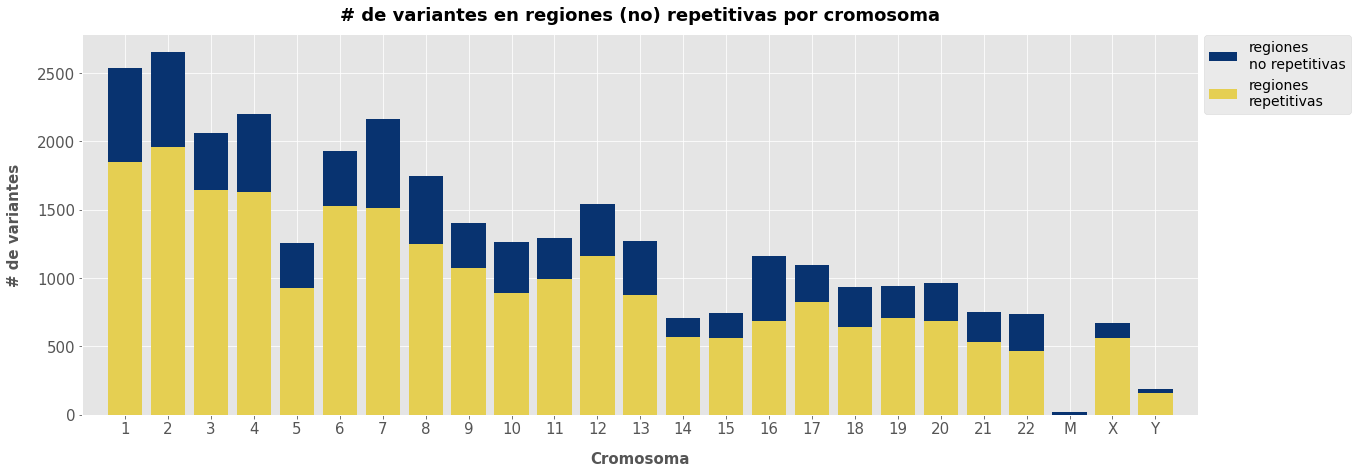

In [34]:
hf.variant_repeat_stacked_barplot(dict_vars_37, dict_repeat_vars_37, "nanopore")

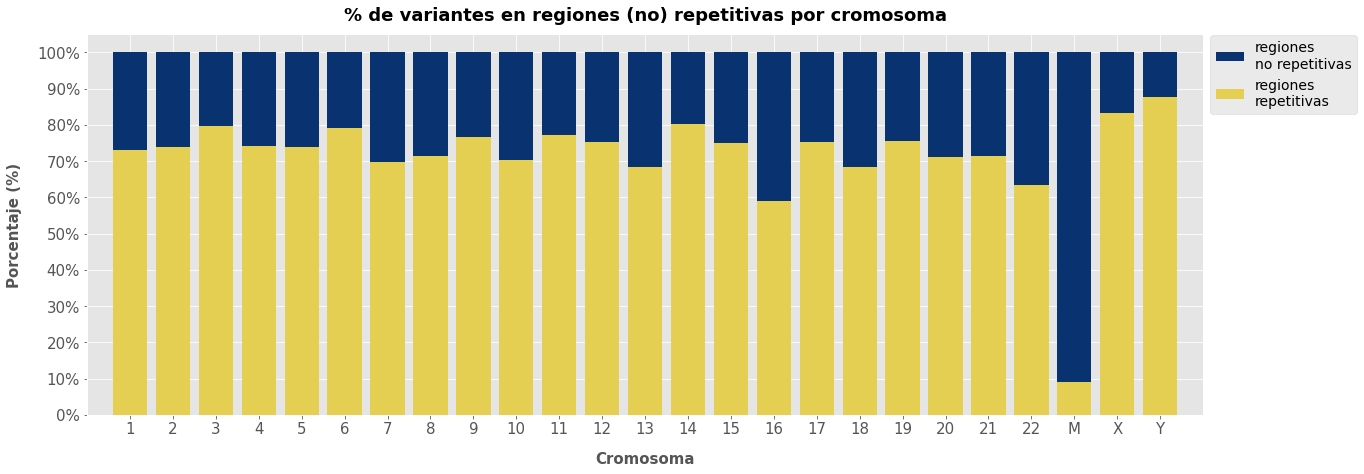

In [35]:
hf.variant_repeat_percentage_stacked_barplot(dict_vars_37, dict_repeat_vars_37, "nanopore")

In [36]:
variants_total = np.array(list(dict_vars_37.values()))
variants_repeated = np.array([len(chromosome) for chromosome in list(dict_repeat_vars_37.values())])
dataframe = pd.DataFrame(np.round(variants_repeated / variants_total * 100, 2),
                         index = list(dict_vars_37.keys()))
dataframe.describe()

0
count  25.000000
mean   71.291600
std    14.247884
min     9.090000
25%    70.380000
50%    73.820000
75%    76.690000
max    87.630000

In [37]:
repeat_classes = []
for key_pos in range(len(dict_repeat_vars_37)):
    for value_pos in range(len(list(dict_repeat_vars_37.values())[key_pos])):
        repeat_classes.extend(list(dict_repeat_vars_37.values())[key_pos][value_pos][1])
repeat_classes_dict = {}
for pos in range(len(repeat_classes)):
    if repeat_classes[pos] not in list(repeat_classes_dict.keys()):
        repeat_classes_dict[repeat_classes[pos]] = 1
    else:
        repeat_classes_dict[repeat_classes[pos]] += 1
repeat_classes_dict = dict(sorted(repeat_classes_dict.items(), key = lambda item: item[0]))        
repeat_classes_dict

{'DNA': 603,
 'DNA/Kolobok': 29,
 'DNA/MULE-MuDR': 220,
 'DNA/Merlin': 5,
 'DNA/PIF-Harbinger': 5,
 'DNA/PiggyBac': 188,
 'DNA/TcMar': 160,
 'DNA/TcMar-Mariner': 1484,
 'DNA/TcMar-Pogo': 2,
 'DNA/TcMar-Tc1': 61,
 'DNA/TcMar-Tc2': 727,
 'DNA/TcMar-Tigger': 11216,
 'DNA/TcMar?': 16,
 'DNA/hAT': 780,
 'DNA/hAT-Ac': 514,
 'DNA/hAT-Blackjack': 1755,
 'DNA/hAT-Charlie': 25309,
 'DNA/hAT-Tag1': 222,
 'DNA/hAT-Tip100': 4808,
 'DNA/hAT-Tip100?': 207,
 'DNA/hAT?': 160,
 'DNA?': 331,
 'DNA?/PiggyBac?': 28,
 'DNA?/hAT-Tip100?': 50,
 'LINE/CR1': 6047,
 'LINE/Dong-R4': 49,
 'LINE/Jockey': 18,
 'LINE/L1': 85943,
 'LINE/L1-Tx1': 11,
 'LINE/L2': 49916,
 'LINE/Penelope': 98,
 'LINE/RTE-BovB': 676,
 'LINE/RTE-X': 1320,
 'LTR': 761,
 'LTR/ERV1': 16326,
 'LTR/ERV1?': 146,
 'LTR/ERVK': 1030,
 'LTR/ERVL': 14860,
 'LTR/ERVL-MaLR': 32098,
 'LTR/ERVL?': 363,
 'LTR/Gypsy': 1555,
 'LTR/Gypsy?': 730,
 'LTR?': 762,
 'Low_complexity': 9522,
 'RC/Helitron': 203,
 'RC?/Helitron?': 50,
 'RNA': 60,
 'Retroposon/SVA': 16

In [38]:
hg19 = hf.RM_out_parser(f"{outdir}/genome/hg19.fa.out", rm_hap_alt = True)
hg19

query_sequence  query_begin  query_end repeat_class/family
ID                                                                
1                 chr1        10001      10468       Simple_repeat
2                 chr1        10469      11447      Satellite/telo
3                 chr1        11505      11675             LINE/L1
4                 chr1        11678      11780     DNA/hAT-Charlie
5                 chr1        15265      15355            SINE/MIR
...                ...          ...        ...                 ...
4277075           chrY     59360948   59361050     DNA/hAT-Charlie
4277076           chrY     59361053   59361244             LINE/L1
4277077           chrY     59361268   59362554      Satellite/telo
4277078           chrY     59362558   59363471       Simple_repeat
4277079           chrY     59363472   59363564       Simple_repeat

[5399438 rows x 4 columns]

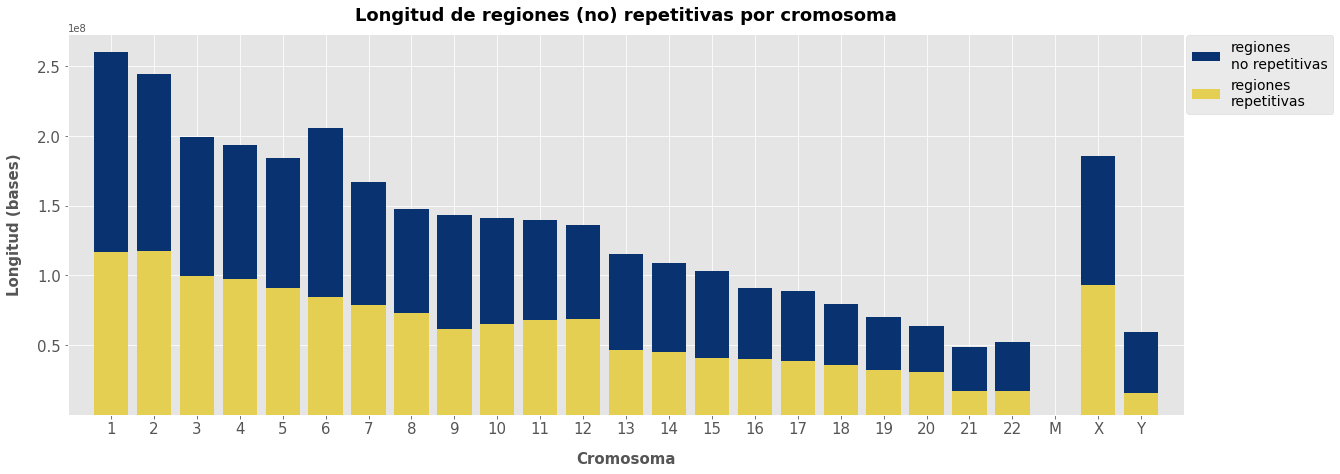

In [39]:
hg19_repeated = hf.repeatedchr_percentage_stacked_barplot(hg19,
                                                          f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                                          "nanopore")

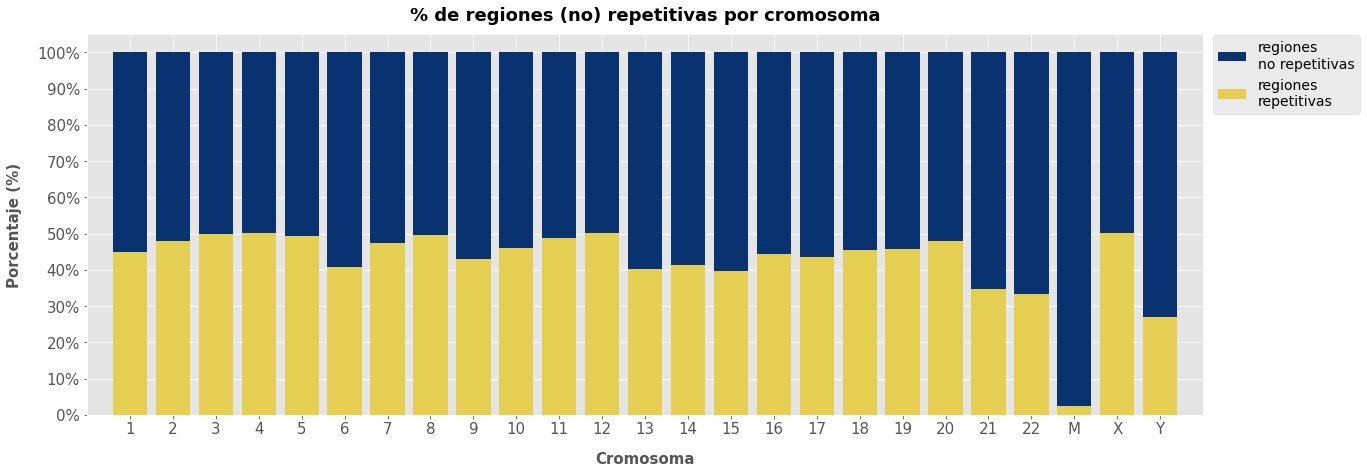

In [40]:
hg19_repeated_percentage = hf.repeatedchr_percentage_stacked_barplot(hg19,
                                                                     f"{outdir}/genome/GRCh37_latest_genomic.fna",
                                                                     "nanopore",
                                                                     percentage = True)

## Influencia repeticiones tipo Alu

In [41]:
alu_vars_ids = []
for key_pos in range(len(dict_repeat_vars_37)):
    for value_pos in range(len(list(dict_repeat_vars_37.values())[key_pos])):
        for repeatt in list(dict_repeat_vars_37.values())[key_pos][value_pos][1]:
            if "Alu" in repeatt:
                df = n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.index == list(dict_repeat_vars_37.values())[key_pos][value_pos][0]))]
                if (abs(df.iloc[0].SV_length) >= 250) and (abs(df.iloc[0].SV_length <= 350)):
                    alu_vars_ids.append(list(dict_repeat_vars_37.values())[key_pos][value_pos][0])
                break
len(alu_vars_ids)

1835

In [42]:
len(n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.SV_type == "INS") &
                                     (n_variants_37_f_df_mod.SV_length.between(250, 350)))])

1644

In [43]:
len(n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.SV_type == "INS") &
                                     (n_variants_37_f_df_mod.SV_length.between(250, 350)) &
                                     (n_variants_37_f_df_mod.index.isin(alu_vars_ids)))])

297

In [44]:
len(n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.SV_type == "DEL") &
                                     (n_variants_37_f_df_mod.SV_length.between(-350, -300)))])

1087

In [45]:
len(n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.SV_type == "DEL") &
                                     (n_variants_37_f_df_mod.SV_length.between(-350, -300)) &
                                     (n_variants_37_f_df_mod.index.isin(alu_vars_ids)))])

867

## Influencia repeticiones tipo L1

In [46]:
l1_vars_ids = []
for key_pos in range(len(dict_repeat_vars_37)):
    for value_pos in range(len(list(dict_repeat_vars_37.values())[key_pos])):
        for repeatt in list(dict_repeat_vars_37.values())[key_pos][value_pos][1]:
            if "L1" in repeatt:
                df = n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.index == list(dict_repeat_vars_37.values())[key_pos][value_pos][0]))]
                if (abs(df.iloc[0].SV_length) >= 5900) and (abs(df.iloc[0].SV_length <= 6125)):
                    l1_vars_ids.append(list(dict_repeat_vars_37.values())[key_pos][value_pos][0])
                break
len(l1_vars_ids)

206

In [47]:
len(n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.SV_type == "INS") &
                                     (n_variants_37_f_df_mod.SV_length.between(5900, 6000)))])

30

In [48]:
len(n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.SV_type == "INS") &
                                     (n_variants_37_f_df_mod.SV_length.between(5900, 6000)) &
                                     (n_variants_37_f_df_mod.index.isin(l1_vars_ids)))])

24

In [49]:
len(n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.SV_type == "DEL") &
                                     (n_variants_37_f_df_mod.SV_length.between(-6125, -6000)))])

46

In [50]:
len(n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.SV_type == "DEL") &
                                     (n_variants_37_f_df_mod.SV_length.between(-6125, -6000)) &
                                     (n_variants_37_f_df_mod.index.isin(l1_vars_ids)))])

44

## Influencia repeticiones tipo LINE

In [51]:
line_vars_ids = []
for key_pos in range(len(dict_repeat_vars_37)):
    for value_pos in range(len(list(dict_repeat_vars_37.values())[key_pos])):
        for repeatt in list(dict_repeat_vars_37.values())[key_pos][value_pos][1]:
            if "LINE" in repeatt:
                df = n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.index == list(dict_repeat_vars_37.values())[key_pos][value_pos][0]))]
                if (abs(df.iloc[0].SV_length) >= 5900) and (abs(df.iloc[0].SV_length <= 6125)):
                    line_vars_ids.append(list(dict_repeat_vars_37.values())[key_pos][value_pos][0])
                break
len(line_vars_ids)

223

In [52]:
len(n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.SV_type == "INS") &
                                     (n_variants_37_f_df_mod.SV_length.between(5900, 6000)))])

30

In [53]:
len(n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.SV_type == "INS") &
                                     (n_variants_37_f_df_mod.SV_length.between(5900, 6000)) &
                                     (n_variants_37_f_df_mod.index.isin(line_vars_ids)))])

27

In [54]:
len(n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.SV_type == "DEL") &
                                     (n_variants_37_f_df_mod.SV_length.between(-6125, -6000)))])

46

In [55]:
len(n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.SV_type == "DEL") &
                                     (n_variants_37_f_df_mod.SV_length.between(-6125, -6000)) &
                                     (n_variants_37_f_df_mod.index.isin(line_vars_ids)))])

45

In [ ]:
plt.figure(figsize = (20, 7))
sv_colors = plt.get_cmap('inferno')(np.linspace(0.2, 0.8, 2))
for pos in range(len(dict_repeat_vars_37)):
    if list(dict_repeat_vars_37.keys())[pos].split("chr")[1] in ["M", "X", "Y"]:
        barplot_total = plt.bar(x = [pos + 1],
                                height = list(dict_vars_37.values())[pos],
                                color = sv_colors[0],
                                label = "Total number of variants per chr")
    else:
        barplot_total = plt.bar(x = [int(list(dict_vars_37.keys())[pos].split("chr")[1])],
                                height = list(dict_vars_37.values())[pos],
                                color = sv_colors[0],
                                label = "Total number of variants per chr")
labels = ["chr" + str(num) for num in range(1, 23)]
labels.extend(["M", "X", "Y"])
plt.xlim(0, len(dict_repeat_vars_37) + 1)
plt.xticks(range(1, len(dict_repeat_vars_37) + 1), labels = labels)
plt.ylim(0, 2750)
plt.legend(handles = [barplot_total], fontsize = 14)
plt.show();

plt.figure(figsize = (20, 7))
for pos in range(len(dict_repeat_vars_37)):
    if list(dict_repeat_vars_37.keys())[pos].split("chr")[1] in ["M", "X", "Y"]:
        barplot_repeatm = plt.bar(x = [pos + 1],
                                  height = len(list(dict_repeat_vars_37.values())[pos]),
                                  color = sv_colors[1],
                                  label = "Number of variants in repeated regions per chr")
    else:
        barplot_repeatm = plt.bar(x = [int(list(dict_repeat_vars_37.keys())[pos].split("chr")[1])],
                                  height = len(list(dict_repeat_vars_37.values())[pos]),
                                  color = sv_colors[1],
                                  label = "Number of variants in repeated regions per chr")

plt.xlim(0, len(dict_repeat_vars_37) + 1)
plt.xticks(range(1, len(dict_repeat_vars_37) + 1), labels = labels)
plt.ylim(0, 2750)
plt.legend(handles = [barplot_repeatm], fontsize = 14)
plt.show();

In [ ]:
plt.figure(figsize = (20, 7))
sv_colors = plt.get_cmap('inferno')(np.linspace(0.05, 0.95, len(dict_repeat_vars_37)))
for pos in range(len(dict_repeat_vars_37)):
    if list(dict_repeat_vars_37.keys())[pos].split("chr")[1] in ["M", "X", "Y"]:
        barplot_repeatm = plt.bar(x = [pos + 1],
                                  height = len(list(dict_repeat_vars_37.values())[pos]) /
                                                list(dict_vars_37.values())[pos] * 100,
                                  color = sv_colors[pos],
                                  label = list(dict_repeat_vars_37.keys())[pos])
    else:
        barplot_repeatm = plt.bar(x = [int(list(dict_repeat_vars_37.keys())[pos].split("chr")[1])],
                                  height = len(list(dict_repeat_vars_37.values())[pos]) /
                                                list(dict_vars_37.values())[pos] * 100,
                                  color = sv_colors[int(list(dict_repeat_vars_37.keys())[pos].split("chr")[1])],
                                  label = list(dict_repeat_vars_37.keys())[pos])
labels = ["chr" + str(num) for num in range(1, 23)]
labels.extend(["M", "X", "Y"])
plt.xlim(0, len(dict_repeat_vars_37) + 1)
plt.xticks(range(1, len(dict_repeat_vars_37) + 1), labels = labels)
plt.ylim(0, 105)
plt.yticks(range(0, 110, 10), [str(num) + "%" for num in range(0, 110, 10)])
plt.axhline(y = 100, color = 'r', linestyle = '--')
plt.show();

In [ ]:
plt.figure(figsize = (20, 7))
sv_colors = plt.get_cmap('inferno')(np.linspace(0.05, 0.95, 11))
for pos in range(len(dict_repeat_vars_37)):
    if list(dict_repeat_vars_37.keys())[pos].split("chr")[1] in ["M", "X", "Y"]:
        barplot_repeatm = plt.bar(x = [pos + 1],
                                  height = len(list(dict_repeat_vars_37.values())[pos]) /
                                                      list(dict_vars_37.values())[pos],
                                  color = sv_colors[int(str(round(len(list(dict_repeat_vars_37.values())[pos]) /
                                                             list(dict_vars_37.values())[pos], 1)).split(".")[1])],
                                  label = list(dict_repeat_vars_37.keys())[pos])
    else:
        barplot_repeatm = plt.bar(x = [int(list(dict_repeat_vars_37.keys())[pos].split("chr")[1])],
                                  height = len(list(dict_repeat_vars_37.values())[pos]) /
                                                      list(dict_vars_37.values())[pos],
                                  color = sv_colors[int(str(round(len(list(dict_repeat_vars_37.values())[pos]) /
                                                             list(dict_vars_37.values())[pos], 1)).split(".")[1])],
                                  label = list(dict_repeat_vars_37.keys())[pos])
labels = ["chr" + str(num) for num in range(1, 23)]
labels.extend(["M", "X", "Y"])
plt.xlim(0, len(dict_repeat_vars_37) + 1)
plt.xticks(range(1, len(dict_repeat_vars_37) + 1), labels = labels)
plt.ylim(0, 1.05)
plt.yticks(np.arange(0, 1.1, 0.1), [str(num) + "%" for num in range(0, 110, 10)])
plt.axhline(y = 100, color = 'r', linestyle = '--')
plt.show();

## Búsqueda de variantes en GENCODE

In [56]:
n_variants_37_f_df_mod

CHROM  variant_begin  variant_end  SV_length SV_type
ID                                                        
35258  chr1              2        58301      58299     DUP
35259  chr1              6        58313      58307     INV
35260  chr1            300          374         74     INS
35261  chr1            807          855         48     INS
35264  chr1           2130         2561        431     INS
...     ...            ...          ...        ...     ...
34216  chrY       59007207     59007238         31     INS
34217  chrY       59013742     59013874        132     INS
34218  chrY       59017779     59017812         33     INS
34219  chrY       59022272     59022305        -33     DEL
34220  chrY       59034251     59034556        305     INS

[32229 rows x 5 columns]

In [57]:
genecode_37_dataset = []
with gzip.open(f"{outdir}/genome/gencode.v36lift37.basic.annotation.gff3.gz", "rb") as file:
    for line in file:
        if "#" not in str(line.decode('utf-8')[0]):
            element = line.decode('utf-8').strip().split()
            element[3] = int(element[3])
            element[4] = int(element[4])
            if element[2] == "gene":
                genecode_37_dataset.append(element)
                
genecode_37_dataset_df = pd.DataFrame(genecode_37_dataset, columns = ["CHROM", "source", "type", "start",
                                                                      "end", "score", "strand", "frame",
                                                                      "attribute"])
genecode_37_dataset_df.sort_values(by = [genecode_37_dataset_df.columns[0],
                                         genecode_37_dataset_df.columns[3]],
                                   inplace = True)
genecode_37_dataset_df

CHROM  source  type     start       end score strand frame  \
0      chr1  HAVANA  gene     11869     14409     .      +     .   
1      chr1  HAVANA  gene     14404     29570     .      -     .   
2      chr1  HAVANA  gene     29554     31109     .      +     .   
3      chr1  HAVANA  gene     34554     36081     .      -     .   
4      chr1  HAVANA  gene     52473     53312     .      +     .   
...     ...     ...   ...       ...       ...   ...    ...   ...   
62438  chrY  HAVANA  gene  59330252  59343488     .      +     .   
62439  chrY  HAVANA  gene  59336889  59354907     .      +     .   
62440  chrY  HAVANA  gene  59347294  59349508     .      -     .   
62441  chrY  HAVANA  gene  59353497  59358381     .      +     .   
62442  chrY  HAVANA  gene  59358335  59360548     .      -     .   

                                               attribute  
0      ID=ENSG00000223972.5;gene_id=ENSG00000223972.5...  
1      ID=ENSG00000227232.5;gene_id=ENSG00000227232.5...  
2      ID=ENSG00000243485.5;gene_id=ENSG00000243485.5...  
3      ID=ENSG00000237613.2;gene_id=ENSG00000237613.2...  
4      ID=ENSG00000268020.3;gene_id=ENSG00000268020.3...  
...                                                  ...  
62438  ID=ENSG00000124334.17_PAR_Y;gene_id=ENSG000001...  
62439  ID=ENSG00000270726.6_PAR_Y;gene_id=ENSG0000027...  
62440  ID=ENSG00000185203.12_PAR_Y;gene_id=ENSG000001...  
62441  ID=ENSG00000182484.15_PAR_Y;gene_id=ENSG000001...  
62442  ID=ENSG00000227159.8_PAR_Y;gene_id=ENSG0000022...  

[62480 rows x 9 columns]

In [58]:
if os.path.isfile(f"{outdir}/nanopore/sniffles_res/found_genes.pkl"):
    with open(f"{outdir}/nanopore/sniffles_res/found_genes.pkl", "rb") as file:
        found_genes = pickle.load(file)
        file.close()
else:
    with open(f"{outdir}/nanopore/sniffles_res/found_genes.pkl", "wb") as file:
        found_genes = pd.DataFrame(columns = genecode_37_dataset_df.columns)
        for pos in range(len(n_variants_37_f_df_mod)):
            sv = n_variants_37_f_df_mod.iloc[pos]
            df = genecode_37_dataset_df.iloc[list((sv.CHROM == genecode_37_dataset_df.CHROM) &
                                                  (sv.variant_end >= genecode_37_dataset_df.start) &
                                                  (sv.variant_begin <= genecode_37_dataset_df.end))]
            found_genes = found_genes.append(df)
        pickle.dump(found_genes, file, -1)
        file.close()
found_genes

CHROM  source  type     start       end score strand frame  \
0      chr1  HAVANA  gene     11869     14409     .      +     .   
1      chr1  HAVANA  gene     14404     29570     .      -     .   
2      chr1  HAVANA  gene     29554     31109     .      +     .   
3      chr1  HAVANA  gene     34554     36081     .      -     .   
4      chr1  HAVANA  gene     52473     53312     .      +     .   
...     ...     ...   ...       ...       ...   ...    ...   ...   
62426  chrY  HAVANA  gene  28654360  28725837     .      +     .   
62427  chrY  HAVANA  gene  28695572  28695890     .      +     .   
62428  chrY  HAVANA  gene  28732789  28737748     .      -     .   
62429  chrY  HAVANA  gene  28740998  28780799     .      -     .   
62430  chrY  HAVANA  gene  28772667  28773306     .      -     .   

                                               attribute  
0      ID=ENSG00000223972.5;gene_id=ENSG00000223972.5...  
1      ID=ENSG00000227232.5;gene_id=ENSG00000227232.5...  
2      ID=ENSG00000243485.5;gene_id=ENSG00000243485.5...  
3      ID=ENSG00000237613.2;gene_id=ENSG00000237613.2...  
4      ID=ENSG00000268020.3;gene_id=ENSG00000268020.3...  
...                                                  ...  
62426  ID=ENSG00000215506.5;gene_id=ENSG00000215506.5...  
62427  ID=ENSG00000224240.1;gene_id=ENSG00000224240.1...  
62428  ID=ENSG00000227629.1;gene_id=ENSG00000227629.1...  
62429  ID=ENSG00000237917.1;gene_id=ENSG00000237917.1...  
62430  ID=ENSG00000231514.1;gene_id=ENSG00000231514.1...  

[25719 rows x 9 columns]

In [59]:
found_genes_f = pd.DataFrame(columns = found_genes.columns)
for pos in range(len(found_genes)):
    gene = found_genes.iloc[pos]
    if "pseudogene" in gene.attribute:
        continue
    else:
        found_genes_f = found_genes_f.append(gene)
found_genes_f.sort_values(by = ["CHROM", "start"], inplace = True)
found_genes_f.drop_duplicates(inplace = True)
found_genes_f

CHROM  source  type      start        end score strand frame  \
2      chr1  HAVANA  gene      29554      31109     .      +     .   
3      chr1  HAVANA  gene      34554      36081     .      -     .   
6      chr1  HAVANA  gene      65419      71585     .      +     .   
7      chr1  HAVANA  gene      89295     133723     .      -     .   
8      chr1  HAVANA  gene      89551      91105     .      -     .   
...     ...     ...   ...        ...        ...   ...    ...   ...   
61672  chrX  HAVANA  gene  151080981  151093642     .      +     .   
61681  chrX  HAVANA  gene  151307355  151355329     .      +     .   
61682  chrX  HAVANA  gene  151334706  151619787     .      -     .   
61856  chrX  HAVANA  gene  155233883  155251901     .      +     .   
61858  chrX  HAVANA  gene  155250491  155255375     .      +     .   

                                               attribute  
2      ID=ENSG00000243485.5;gene_id=ENSG00000243485.5...  
3      ID=ENSG00000237613.2;gene_id=ENSG00000237613.2...  
6      ID=ENSG00000186092.6;gene_id=ENSG00000186092.6...  
7      ID=ENSG00000238009.6;gene_id=ENSG00000238009.6...  
8      ID=ENSG00000239945.1;gene_id=ENSG00000239945.1...  
...                                                  ...  
61672  ID=ENSG00000147381.11;gene_id=ENSG00000147381....  
61681  ID=ENSG00000231937.1;gene_id=ENSG00000231937.1...  
61682  ID=ENSG00000011677.13;gene_id=ENSG00000011677....  
61856  ID=ENSG00000270726.6;gene_id=ENSG00000270726.6...  
61858  ID=ENSG00000182484.15;gene_id=ENSG00000182484....  

[11613 rows x 9 columns]

In [60]:
h_significants = ["BRAF", "NRAS", "BCLAF1", "TP53", "CDKN2A", "RAC1"]
h_significants_df = pd.DataFrame(columns = found_genes_f.columns)
for h_significant in h_significants:
    df = found_genes_f.iloc[list(found_genes_f.attribute.str.contains(h_significant))]
    if len(df) > 0:
        h_significants_df = h_significants_df.append(df)
for pos in range(len(h_significants_df)):
    if pos == len(h_significants_df) - 1:
        print(h_significants_df.iloc[pos].attribute.split("name=")[1].split(";")[0] + ".", end = "")
    else:
        print(h_significants_df.iloc[pos].attribute.split("name=")[1].split(";")[0] + ", ", end = "")

TP53I11, TP53TG3B, CDKN2A-DT, CDKN2A, SERAC1.

In [61]:
significants = ["XIRP2", "MYOCD", "ALPK2", "PTEN", "PPP6C", "FRMD7", "OR4A16", "OR52N1", "WASF3", "CDK4", "LCTL",
                "STK19", "ACO1"]
significants_df = pd.DataFrame(columns = found_genes_f.columns)
for significant in significants:
    df = found_genes_f.iloc[list(found_genes_f.attribute.str.contains(significant))]
    if len(df) > 0:
        significants_df = significants_df.append(df)
for pos in range(len(significants_df)):
    if pos == len(significants_df) - 1:
        print(significants_df.iloc[pos].attribute.split("name=")[1].split(";")[0] + ".", end = "")
    else:
        print(significants_df.iloc[pos].attribute.split("name=")[1].split(";")[0] + ", ", end = "")

XIRP2, ALPK2, PTEN, PPP6C, OR4A16, MACO1, ACO1.

In [62]:
n_significants = ["ANK3", "MXRA5", "GPR116", "SLC12A8", "EGFL6", "PCDP1", "ARID2", "CCDC148", "SNX31", "SLC44A4",
                  "CTNNB1", "MGC42105", "ZNF217", "RXRA", "NCOR1", "ALDH1B1", "ZNF750", "PIK3CA", "FDXACB1",
                  "KIT"]
n_significants_df = pd.DataFrame(columns = found_genes_f.columns)
for n_significant in n_significants:
    df = found_genes_f.iloc[list(found_genes_f.attribute.str.contains(n_significant))]
    if len(df) > 0:
        n_significants_df = n_significants_df.append(df)
for pos in range(len(n_significants_df)):
    if pos == len(n_significants_df) - 1:
        print(n_significants_df.iloc[pos].attribute.split("name=")[1].split(";")[0] + ".", end = "")
    else:
        print(n_significants_df.iloc[pos].attribute.split("name=")[1].split(";")[0] + ", ", end = "")

ANK3, KANK3, SHANK3, MXRA5, SLC12A8, EGFL6, ARID2, JARID2, CCDC148, SNX31, CTNNB1, RXRA, NCOR1.

In [63]:
braf = found_genes_f.iloc[list(found_genes_f.attribute.str.contains("BRAF"))]
display(braf)
for pos in range(len(braf)):
    display(n_variants_37_f_df_mod.iloc[list((braf.iloc[pos].to_list()[0] == n_variants_37_f_df_mod.CHROM) &
                                             (braf.iloc[pos].to_list()[3] < n_variants_37_f_df_mod.variant_end) &
                                             (braf.iloc[pos].to_list()[4] > n_variants_37_f_df_mod.variant_begin))])

Empty DataFrame
Columns: [CHROM, source, type, start, end, score, strand, frame, attribute]
Index: []

In [64]:
cdkn2a = found_genes_f.iloc[list(found_genes_f.attribute.str.contains("CDKN2A"))]
display(cdkn2a)
for pos in range(len(cdkn2a)):
    print(cdkn2a.iloc[pos].attribute.split("name=")[1].split(";")[0] + " affecting variants:")
    display(n_variants_37_f_df_mod.iloc[list((cdkn2a.iloc[pos].to_list()[0] == n_variants_37_f_df_mod.CHROM) &
                                             (cdkn2a.iloc[pos].to_list()[3] < n_variants_37_f_df_mod.variant_end) &
                                             (cdkn2a.iloc[pos].to_list()[4] > n_variants_37_f_df_mod.variant_begin))])

CHROM  source  type     start       end score strand frame  \
28391  chr9  HAVANA  gene  21966928  21967750     .      +     .   
28392  chr9  HAVANA  gene  21967751  21995300     .      -     .   

                                               attribute  
28391  ID=ENSG00000224854.3;gene_id=ENSG00000224854.3...  
28392  ID=ENSG00000147889.18;gene_id=ENSG00000147889....

CDKN2A-DT affecting variants:


CHROM  variant_begin  variant_end  SV_length SV_type
ID                                                        
17537  chr9        6727584     30688960  -23961376     DEL

CDKN2A affecting variants:


CHROM  variant_begin  variant_end  SV_length SV_type
ID                                                        
17537  chr9        6727584     30688960  -23961376     DEL
17648  chr9       21990611     21990649        -38     DEL

In [65]:
fzd7 = found_genes_f.iloc[list(found_genes_f.attribute.str.contains("FZD7"))]
display(fzd7)
for pos in range(len(fzd7)):
    display(n_variants_37_f_df_mod.iloc[list((fzd7.iloc[pos].to_list()[0] == n_variants_37_f_df_mod.CHROM) &
                                             (fzd7.iloc[pos].to_list()[3] < n_variants_37_f_df_mod.variant_end) &
                                             (fzd7.iloc[pos].to_list()[4] > n_variants_37_f_df_mod.variant_begin))])

Empty DataFrame
Columns: [CHROM, source, type, start, end, score, strand, frame, attribute]
Index: []

In [66]:
tert = found_genes_f.iloc[list(found_genes_f.attribute.str.contains("TERT"))]
display(tert)
for pos in range(len(tert)):
    display(n_variants_37_f_df_mod.iloc[list((tert.iloc[pos].to_list()[0] == n_variants_37_f_df_mod.CHROM) &
                                             (tert.iloc[pos].to_list()[3] < n_variants_37_f_df_mod.variant_end) &
                                             (tert.iloc[pos].to_list()[4] > n_variants_37_f_df_mod.variant_begin))])

CHROM  source  type    start      end score strand frame  \
16205  chr5  HAVANA  gene  1253262  1295183     .      -     .   

                                               attribute  
16205  ID=ENSG00000164362.21;gene_id=ENSG00000164362....

CHROM  variant_begin  variant_end  SV_length SV_type
ID                                                       
9956  chr5        1276770      1276823        -53     DEL
9957  chr5        1284536      1284598         62     INS
9958  chr5        1290421      1290522        101     INS
9959  chr5        1291760      1291840         80     INS

In [67]:
ndufb9 = found_genes_f.iloc[list(found_genes_f.attribute.str.contains("NDUFB9"))]
display(ndufb9)
for pos in range(len(ndufb9)):
    display(n_variants_37_f_df_mod.iloc[list((ndufb9.iloc[pos].to_list()[0] == n_variants_37_f_df_mod.CHROM) &
                                             (ndufb9.iloc[pos].to_list()[3] < n_variants_37_f_df_mod.variant_end) &
                                             (ndufb9.iloc[pos].to_list()[4] > n_variants_37_f_df_mod.variant_begin))])

Empty DataFrame
Columns: [CHROM, source, type, start, end, score, strand, frame, attribute]
Index: []

In [68]:
pten = found_genes_f.iloc[list(found_genes_f.attribute.str.contains("PTEN"))]
display(pten)
for pos in range(len(pten)):
    display(n_variants_37_f_df_mod.iloc[list((pten.iloc[pos].to_list()[0] == n_variants_37_f_df_mod.CHROM) &
                                             (pten.iloc[pos].to_list()[3] < n_variants_37_f_df_mod.variant_end) &
                                             (pten.iloc[pos].to_list()[4] > n_variants_37_f_df_mod.variant_begin))])

CHROM  source  type     start       end score strand frame  \
32128  chr10  HAVANA  gene  89623382  89731687     .      +     .   

                                               attribute  
32128  ID=ENSG00000171862.11;gene_id=ENSG00000171862....

CHROM  variant_begin  variant_end  SV_length SV_type
ID                                                         
20023  chr10       89676311     89676343        -32     DEL
20024  chr10       89700300     89712341     -12041     DEL

In [69]:
tp53 = found_genes_f.iloc[list(found_genes_f.attribute.str.contains("TP53TG3B"))]
display(tp53)
for pos in range(len(pten)):
    display(n_variants_37_f_df_mod.iloc[list((tp53.iloc[pos].to_list()[0] == n_variants_37_f_df_mod.CHROM) &
                                             (tp53.iloc[pos].to_list()[3] < n_variants_37_f_df_mod.variant_end) &
                                             (tp53.iloc[pos].to_list()[4] > n_variants_37_f_df_mod.variant_begin))])

CHROM  source  type     start       end score strand frame  \
46911  chr16  HAVANA  gene  33261515  33264719     .      +     .   

                                               attribute  
46911  ID=ENSG00000261509.6;gene_id=ENSG00000261509.6...

CHROM  variant_begin  variant_end  SV_length SV_type
ID                                                         
26918  chr16       33241256     33293717     -52461     DEL

In [70]:
del_inv = n_variants_37_f_df_mod.iloc[list(n_variants_37_f_df_mod.SV_type == "DEL/INV")]
display(del_inv)
del_inv_gene = genecode_37_dataset_df.iloc[list((del_inv.iloc[0].CHROM == genecode_37_dataset_df.CHROM) &
                                                (del_inv.iloc[0].variant_end >= genecode_37_dataset_df.start) &
                                                (del_inv.iloc[0].variant_begin <= genecode_37_dataset_df.end))]
display(del_inv_gene)
print(del_inv_gene.iloc[0].attribute.split("name=")[1].split(";")[0])

CHROM  variant_begin  variant_end  SV_length  SV_type
ID                                                          
35891  chr17         101793       102078       -285  DEL/INV

CHROM  source  type  start     end score strand frame  \
48225  chr17  HAVANA  gene  62180  236045     .      -     .   

                                               attribute  
48225  ID=ENSG00000181031.16;gene_id=ENSG00000181031....

RPH3AL


In [71]:
found_genes_f.iloc[list(found_genes_f.attribute.str.contains("CDK4"))]

Empty DataFrame
Columns: [CHROM, source, type, start, end, score, strand, frame, attribute]
Index: []

## Búsqueda de variantes en los resultados del TCGA

In [72]:
tcga_genes = []
for candidate in ["KIT", "PDGFRA", "KDR", "CDK4", "CCND1", "MDM2", "TERT", "MITF", "RAF1", "AKT3", "HMGA2"]:
    if len(found_genes_f.iloc[list(found_genes_f.attribute.str.contains(candidate))]) > 0:
        tcga_genes.extend([found.split("name=")[1].split(";")[0] for found in found_genes_f.iloc[list(found_genes_f.attribute.str.contains(candidate))].attribute.to_list()])
tcga_genes = tcga_genes[:-1]

In [73]:
for tcga in tcga_genes:
    tcga = found_genes_f.iloc[list(found_genes_f.attribute.str.contains(tcga))].iloc[0]
    print("{0} affecting variants:".format(tcga.attribute.split("name=")[1].split(";")[0]))
    display(n_variants_37_f_df_mod.iloc[list((tcga.to_list()[0] == n_variants_37_f_df_mod.CHROM) &
                                             (tcga.to_list()[3] < n_variants_37_f_df_mod.variant_end) &
                                             (tcga.to_list()[4] > n_variants_37_f_df_mod.variant_begin))])
    print()

CCND1 affecting variants:


CHROM  variant_begin  variant_end  SV_length SV_type
ID                                                         
20753  chr11       22265451     94157267  -71891816     DEL


MDM2 affecting variants:


CHROM  variant_begin  variant_end  SV_length SV_type
ID                                                         
22636  chr12       69227061     69227189        128     INS


TERT affecting variants:


CHROM  variant_begin  variant_end  SV_length SV_type
ID                                                       
9956  chr5        1276770      1276823        -53     DEL
9957  chr5        1284536      1284598         62     INS
9958  chr5        1290421      1290522        101     INS
9959  chr5        1291760      1291840         80     INS


MITF affecting variants:


CHROM  variant_begin  variant_end  SV_length SV_type
ID                                                       
5229  chr3          60001     75276888   75216887     DUP
5885  chr3       69804589     69804624        -35     DEL


RAF1 affecting variants:


CHROM  variant_begin  variant_end  SV_length SV_type
ID                                                       
5229  chr3          60001     75276888   75216887     DUP


AKT3 affecting variants:


CHROM  variant_begin  variant_end  SV_length SV_type
ID                                                       
2279  chr1      243689140    243689475        335     INS
2280  chr1      243691209    243691251        -42     DEL
2281  chr1      243782751    243783747       -996     DEL
2282  chr1      243995423    243995461        -38     DEL
2283  chr1      244008723    244012921       4198     INS


HMGA2 affecting variants:


CHROM  variant_begin  variant_end  SV_length SV_type
ID                                                         
22615  chr12       66269369     66269404        -35     DEL

## Búsqueda de variantes en Cancer Gene Census

In [74]:
cgs = pd.read_csv(f"{outdir}/genome/Census_symbolMon Jan 18 12_02_24 2021.csv", header = 0)
cgs

Gene Symbol                                               Name  \
0          ABI1                                   abl-interactor 1   
1          ABL1  v-abl Abelson murine leukemia viral oncogene h...   
2          ABL2     c-abl oncogene 2, non-receptor tyrosine kinase   
3         ACKR3                      atypical chemokine receptor 3   
4         ACSL3     acyl-CoA synthetase long-chain family member 3   
..          ...                                                ...   
571       ZMYM2                            zinc finger protein 198   
572      ZNF331                            zinc finger protein 331   
573      ZNF384                 zinc finger protein 384 (CIZ/NMP4)   
574      ZNF521                            zinc finger protein 521   
575       ZRSR2  zinc finger (CCCH type), RNA-binding motif and...   

     Entrez GeneId        Genome Location  Tier       Tumour Types(Somatic)  \
0          10006.0   10:27035522-27149864     1                         AML   
1             25.0  9:133589333-133761070     1             CML, ALL, T-ALL   
2             27.0  1:179068462-179198736     1                         AML   
3          57007.0  2:237478284-237491001     1                      lipoma   
4           2181.0  2:223725652-223809357     1                    prostate   
..             ...                    ...   ...                         ...   
571         7750.0   13:20532810-20665968     1                    MPN, NHL   
572        55422.0   19:54024278-54083523     1  follicular thyroid adenoma   
573       171017.0     12:6775814-6798676     1                         ALL   
574        25925.0   18:22641890-22932116     1                         ALL   
575         8233.0    X:15808595-15841383     1                    MDS, CLL   

    Tumour Types(Germline)                                           Synonyms  
0                      NaN  10006,ABI-1,ABI1,E3B1,ENSG00000136754.12,Q8IZP...  
1                      NaN  25,ABL,ABL1,ENSG00000097007.13,JTK7,P00519,c-A...  
2                      NaN         27,ABL2,ABLL,ARG,ENSG00000143322.15,P42684  
3                      NaN  57007,ACKR3,CMKOR1,CXCR7,ENSG00000144476.5,GPR...  
4                      NaN  2181,ACS3,ACSL3,ENSG00000123983.9,FACL3,O95573...  
..                     ...                                                ...  
571                    NaN  7750,ENSG00000121741.12,FIM,MYM,Q9UBW7,RAMP,ZM...  
572                    NaN  55422,ENSG00000130844.12,Q9NQX6,RITA,ZNF331,ZN...  
573                    NaN  171017,CAGH1A,CIZ,ENSG00000126746.13,NMP4,NP,Q...  
574                    NaN    25925,EHZF,ENSG00000198795.6,Evi3,Q96K83,ZNF521  
575                    NaN  8233,ENSG00000169249.8,Q15696,U2AF1-RS2,U2AF1L...  

[576 rows x 8 columns]

In [75]:
cgs_found_genes = pd.DataFrame(columns = cgs.columns)
for pos in range(len(found_genes_f)):
    gene = found_genes_f.iloc[pos]
    df = cgs.iloc[list(cgs.loc[:, cgs.columns[0]] == gene.attribute.split("name=")[1].split(";")[0])]
    if len(df) > 0:
        cgs_found_genes = cgs_found_genes.append(df)
cgs_found_genes.drop_duplicates(inplace = True)
cgs_found_genes

Gene Symbol                                          Name  Entrez GeneId  \
416      PRDM16                       PR domain containing 16        63976.0   
65       CAMTA1  calmodulin binding transcription activator 1        23261.0   
381        PAX7                             paired box gene 7         5081.0   
20       ARID1A      AT rich interactive domain 1A (SWI-like)         8289.0   
328       MUTYH                        mutY homolog (E. coli)         4595.0   
..          ...                                           ...            ...   
48         BCOR                              BCL6 corepressor        54880.0   
264       KDM6A       lysine (K)-specific demethylase 6A, UTX         7403.0   
307       MED12                   mediator complex subunit 12         9968.0   
501       STAG2                             stromal antigen 2        10735.0   
49       BCORL1                       BCL6 corepressor-like 1        63035.0   

           Genome Location Tier  \
416      1:2985775-3355185    1   
65       1:6845384-7829766    1   
381    1:18957500-19062632    1   
20     1:27022524-27108595    1   
328    1:45794914-45806060    1   
..                     ...  ...   
48     X:39910501-39956656    1   
264    X:44732757-44971847    1   
307    X:70338573-70362297    1   
501  X:123094369-123235348    1   
49   X:129139164-129192058    1   

                                 Tumour Types(Somatic) Tumour Types(Germline)  \
416                                           MDS, AML                    NaN   
65                   epithelioid haemangioendothelioma                    NaN   
381                          alveolar rhabdomyosarcoma                    NaN   
20           clear cell ovarian carcinoma, RCC, breast                    NaN   
328                                                NaN             colorectal   
..                                                 ...                    ...   
48            retinoblastoma, AML, APL (translocation)                    NaN   
264  renal cell carcinoma, bladder carcinoma, oesop...                    NaN   
307  uterine leiomyoma, fibroadenoma, phyllodes tumour                    NaN   
501  bladder carcinoma, glioblastoma, melanoma, Ewi...                    NaN   
49                                          AML, HNSCC                    NaN   

                                              Synonyms  
416  63976,ENSG00000142611.12,KIAA1675,KMT8F,MEL1,M...  
65     23261,CAMTA1,ENSG00000171735.14,KIAA0833,Q9Y6Y1  
381            5081,ENSG00000009709.7,Hup1,P23759,PAX7  
20   8289,ARID1A,B120,BAF250,BAF250a,C10rf4,C1orf4,...  
328           4595,ENSG00000132781.13,MUTYH,MYH,Q9UIF7  
..                                                 ...  
48   54880,BCOR,ENSG00000183337.12,FLJ20285,KIAA157...  
264           7403,ENSG00000147050.10,KDM6A,O15550,UTX  
307  9968,CAGH45,ENSG00000184634.11,FGS1,HOPA,KIAA0...  
501  10735,ENSG00000101972.14,Q8N3U4,SA-2,SA2,SCC3B...  
49   63035,BCORL1,CXorf10,ENSG00000085185.11,FLJ113...  

[243 rows x 8 columns]

In [76]:
cgs_affecting_vars_df = pd.DataFrame(columns = n_variants_37_f_df_mod.columns)
for gene in list(np.unique(cgs_found_genes.loc[:, cgs.columns[0]])):
    genecode_gene = found_genes_f.iloc[list(found_genes_f.attribute.str.contains(gene))]
    for pos in range(len(genecode_gene)):
        if genecode_gene.iloc[pos].attribute.split("name=")[1].split(";")[0] == gene:
            genecode_gene = genecode_gene.iloc[pos]
            break
    cgs_affecting_vars = n_variants_37_f_df_mod.iloc[list((n_variants_37_f_df_mod.CHROM == genecode_gene.CHROM) &
                                                          (n_variants_37_f_df_mod.variant_begin <= genecode_gene.end) &
                                                          (n_variants_37_f_df_mod.variant_end >= genecode_gene.start))]
    cgs_affecting_vars_df = cgs_affecting_vars_df.append(cgs_affecting_vars)
cgs_affecting_vars_df.sort_values(by = [cgs_affecting_vars_df.columns[0], cgs_affecting_vars_df.columns[1]],
                                  inplace = True)
cgs_affecting_vars_df = cgs_affecting_vars_df.iloc[list(cgs_affecting_vars_df.SV_type != "BND")]
cgs_affecting_vars_df

CHROM variant_begin variant_end SV_length SV_type
168    chr1       3021146     3021224        78     INS
169    chr1       3028031     3028064        33     INS
170    chr1       3079568     3079611        43     INS
171    chr1       3079827     3079957       130     INS
172    chr1       3081981     3082182      -201     DEL
...     ...           ...         ...       ...     ...
33933  chrX     123262559   123262605        46     INS
33934  chrX     123262608   123262766       158     INS
33935  chrX     123311507   123311566        59     INS
33936  chrX     123312948   123312979        31     INS
33966  chrX     129123419   129123453       -34     DEL

[558 rows x 5 columns]

In [77]:
cgs_affecting_vars_df.iloc[list(np.absolute(cgs_affecting_vars_df.SV_length) < 50)]

CHROM variant_begin variant_end SV_length SV_type
169    chr1       3028031     3028064        33     INS
170    chr1       3079568     3079611        43     INS
177    chr1       3186355     3186395        40     INS
183    chr1       3344833     3344881        48     INS
256    chr1       6957534     6957565        31     INS
...     ...           ...         ...       ...     ...
33681  chrX      70352621    70352662       -41     DEL
33932  chrX     123094453   123094495       -42     DEL
33933  chrX     123262559   123262605        46     INS
33936  chrX     123312948   123312979        31     INS
33966  chrX     129123419   129123453       -34     DEL

[242 rows x 5 columns]